<a href="https://colab.research.google.com/github/bidlopov/ML_Convolution/blob/main/BootShoeSandal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [3]:
train_images = train_generator.flow_from_directory(
    '/content/drive/MyDrive/CollabDataset_Smol/train',
    target_size=(136, 102),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)
print(len(train_images))

test_images = test_generator.flow_from_directory(
    '/content/drive/MyDrive/CollabDataset_Smol/test',
    target_size=(136, 102),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False #перемешивание изображений в алф порядке
)
test_images.image_shape
print(len(train_images))

val_images = train_generator.flow_from_directory(
    '/content/drive/MyDrive/CollabDataset_Smol/validation',
    target_size=(136, 102),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)
print(len(train_images))

Found 4500 images belonging to 3 classes.
141
Found 1500 images belonging to 3 classes.
141
Found 1500 images belonging to 3 classes.
141


In [4]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model1 = Sequential()
#
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (136,102,3)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
#
model1.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
#
model1.add(Flatten())
model1.add(Dense(256, activation = "relu"))
model1.add(Dropout(0.25))
model1.add(Dense(3, activation = "softmax"))

print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 136, 102, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 68, 51, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 68, 51, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 51, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 25, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 34, 25, 64)        0

In [5]:
optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [6]:
history1 = model1.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            verbose=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
141/141 [==============================] - 337s 2s/step - loss: 0.6571 - accuracy: 0.7596 - val_loss: 0.5034 - val_accuracy: 0.8267
Epoch 2/10
141/141 [==============================] - 322s 2s/step - loss: 0.2366 - accuracy: 0.9131 - val_loss: 0.3727 - val_accuracy: 0.8733
Epoch 3/10
141/141 [==============================] - 319s 2s/step - loss: 0.1591 - accuracy: 0.9411 - val_loss: 0.3256 - val_accuracy: 0.8980
Epoch 4/10
141/141 [==============================] - 328s 2s/step - loss: 0.1237 - accuracy: 0.9578 - val_loss: 0.2931 - val_accuracy: 0.9020
Epoch 5/10
141/141 [==============================] - 317s 2s/step - loss: 0.0936 - accuracy: 0.9684 - val_loss: 0.3503 - val_accuracy: 0.9027
Epoch 6/10
141/141 [==============================] - 319s 2s/step - loss: 0.0702 - accuracy: 0.9769 - val_loss: 0.3085 - val_accuracy: 0.8960
Epoch 7/10
141/141 [==============================] - 331s 2s/step - loss: 0.0568 - accuracy: 0.9798 - val_loss: 0.3437 - val_accuracy: 0.9053

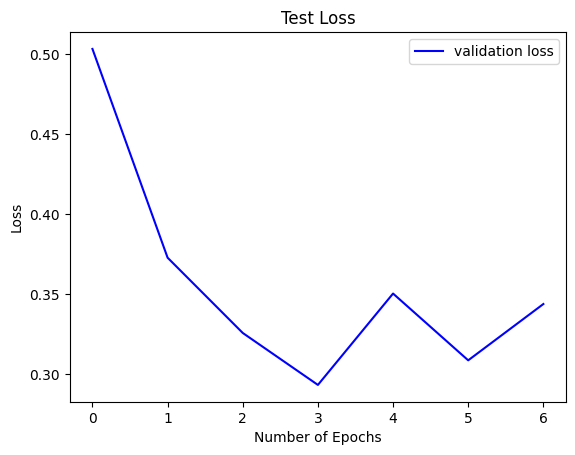

In [7]:
import matplotlib.pyplot as plt
plt.plot(history1.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix


# Predict the values from the test dataset
Y_pred1 = model1.predict(test_images)

47/47 [==============================] - 245s 5s/step


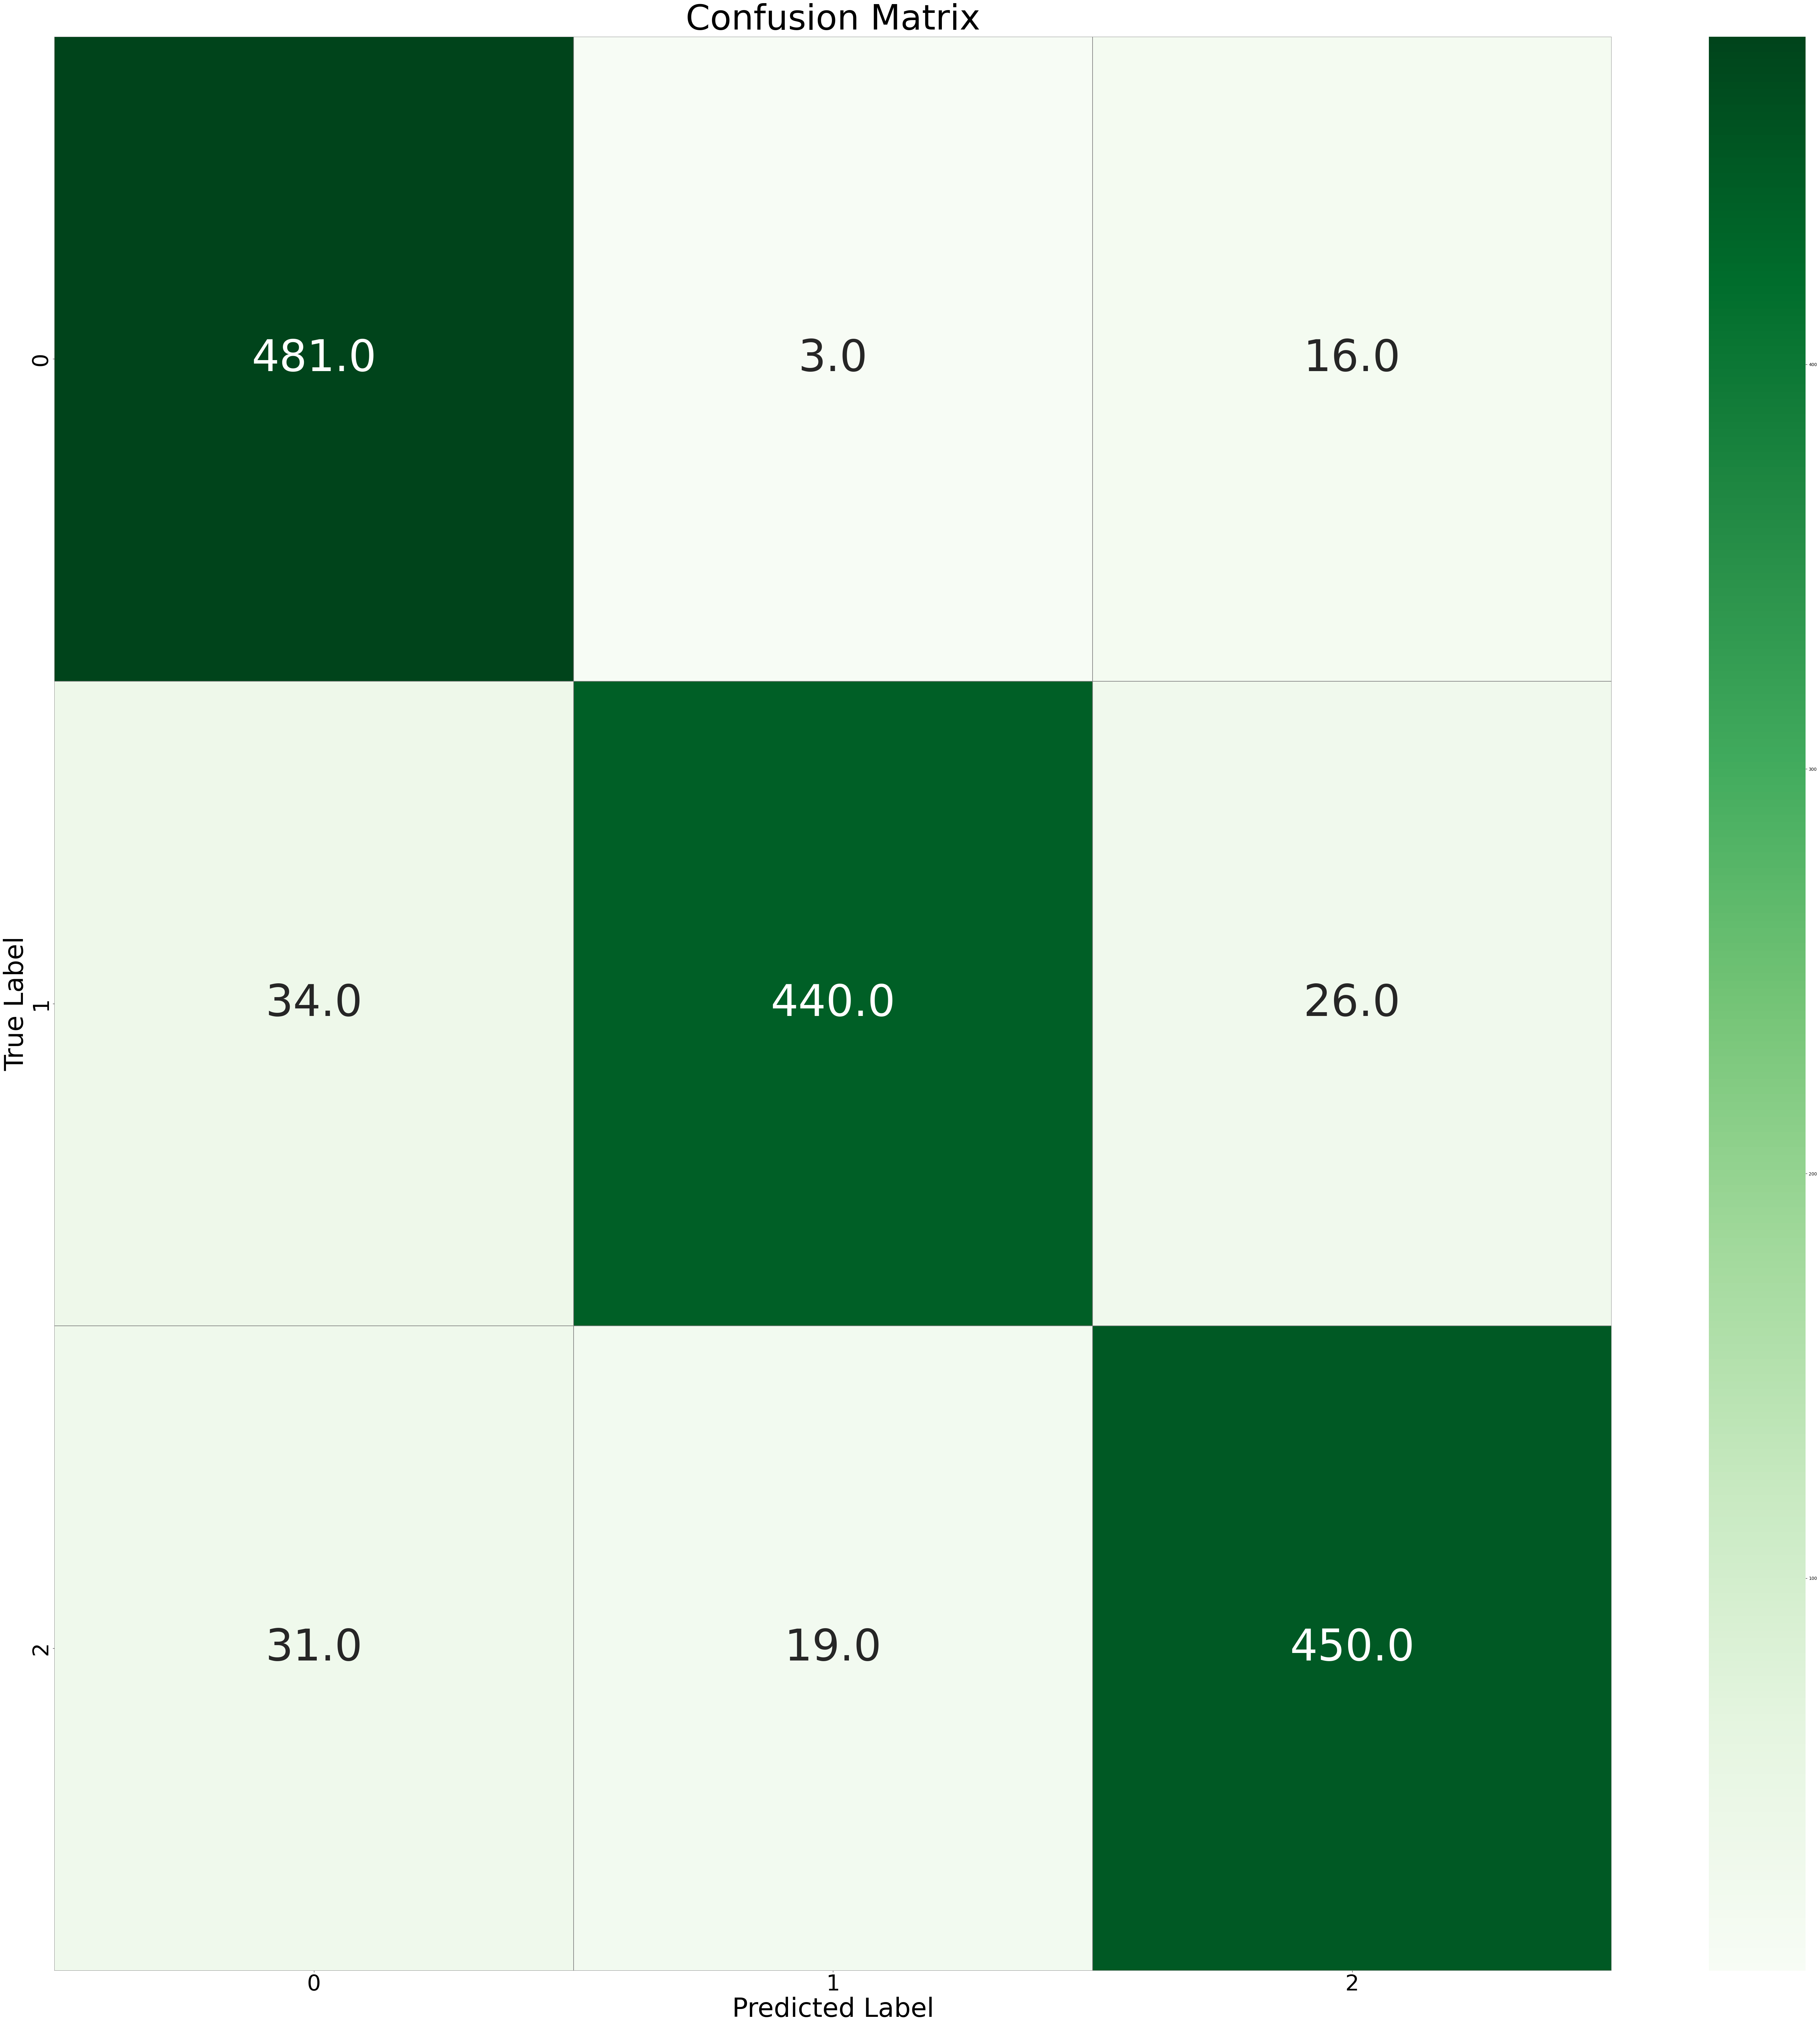

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred_classes1 = np.argmax(Y_pred1, axis=1)
Y_true1 = test_images.labels
confusion_mtx1 = confusion_matrix(Y_true1, Y_pred_classes1)

f, ax1 = plt.subplots(figsize=(80, 80))
sns.heatmap(confusion_mtx1, annot=True, annot_kws={"size": 100}, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax1)
plt.xlabel("Predicted Label", fontsize=60)
plt.ylabel("True Label", fontsize=60)
plt.title("Confusion Matrix", fontsize=80)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.show()


In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y_true1,Y_pred_classes1))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       500
           1       0.95      0.88      0.91       500
           2       0.91      0.90      0.91       500

    accuracy                           0.91      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.91      0.91      1500



1/1 [==============================] - 0s 36ms/step


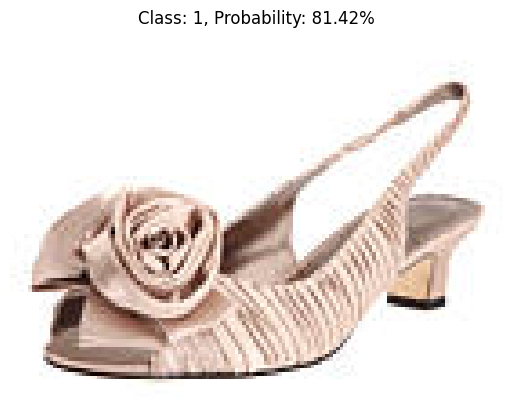

1/1 [==============================] - 0s 37ms/step


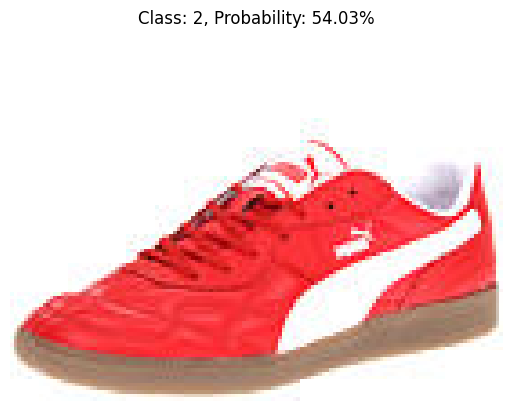

1/1 [==============================] - 0s 35ms/step


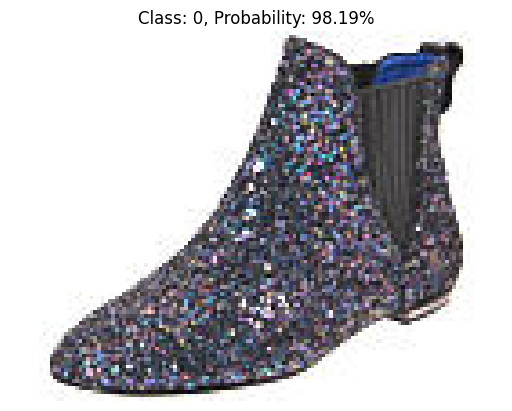

In [20]:
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

target_size = (136, 102)
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    return img_array

image_paths = [
    '/content/drive/MyDrive/CollabDataset_Smol/trytoguess/Sandal (1909).jpg',
    '/content/drive/MyDrive/CollabDataset_Smol/trytoguess/Shoe (1828).jpg',
    '/content/drive/MyDrive/CollabDataset_Smol/trytoguess/boot (1835).jpg'
]

for img_path in image_paths:
    img = preprocess_image(img_path, target_size)
    pred = model1.predict(img)
    pred_class = np.argmax(pred, axis=1)[0]
    pred_proba = np.max(pred, axis=1)[0] * 100  # p%

    img_display = image.load_img(img_path)
    plt.imshow(img_display)
    plt.title(f'Class: {pred_class}, Probability: {pred_proba:.2f}%')
    plt.axis('off')
    plt.show()
